In [43]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display, HTML
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [44]:
#Reading the file and displaying the info
file_path = "Student_performance_data _ (1).csv"  # <-- your file
df = pd.read_csv(file_path, delimiter=',')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
display(HTML(df.to_html(notebook=True)))
print("\n===== DATASET INFO =====")
print(df.info())

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0



===== DATASET INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 K

In [45]:
#description of the data
df.describe()



,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [46]:
df.columns = df.columns.str.strip()
# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())
# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [47]:
#droping null values
df = df.dropna()
# Encode categorical columns properly
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['ParentalEducation'] = df['ParentalEducation'].replace({
    'None': 0,
    'High School': 1,
    'Diploma': 2,
    'Graduate': 3,
    'Postgraduate': 4
})
df['Tutoring'] = df['Tutoring'].replace({'Yes': 1, 'No': 0})
df['ParentalSupport'] = df['ParentalSupport'].replace({'Low': 0, 'Moderate': 1, 'High': 2})
df['Extracurricular'] = df['Extracurricular'].replace({'Yes': 1, 'No': 0})
df['Sports'] = df['Sports'].replace({'Yes': 1, 'No': 0})
df['Music'] = df['Music'].replace({'Yes': 1, 'No': 0})
df['Volunteering'] = df['Volunteering'].replace({'Yes': 1, 'No': 0})

# Optional: encode GradeClass if it’s categorical
df['GradeClass'] = df['GradeClass'].replace({'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0})


In [48]:
#after categorizing just showing the first few categorized data
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [49]:
#showing the columns
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [50]:
# Ensure column names are consistent
df.columns = df.columns.str.strip()  # remove any trailing spaces
# Define target (Y) and features (X)
Y = df['GPA']
X = df[['Age', 'Gender', 'ParentalEducation', 'StudyTimeWeekly', 'Absences',
        'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music',
        'Volunteering', 'GradeClass']]


In [59]:
#training and testing the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=800)

In [60]:
#creating a list of the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=200),
    "SVM": SVR(),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=300)
}


In [61]:
#calculating the predictions table
trained_models={}
results = {}
predictions_table = pd.DataFrame({"Actual GPA": Y_test})

for name, model in models.items():
    model.fit(X_train, Y_train)
    trained_models[name] = model
    Y_pred = model.predict(X_test)

    # Save predictions
    predictions_table[name] = Y_pred
    # Evaluation Metrics
    Y_test_safe = Y_test.copy()
    Y_test_safe[Y_test_safe == 0] = 1e-8  # avoid divide-by-zero
    r2 = r2_score(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    mape = np.mean(np.abs((Y_test - Y_pred) / Y_test_safe)) * 100

    results[name] = {"R2": r2, "MAE": mae, "RMSE": rmse, "MAPE": mape}


In [62]:
#printing the result frame
results_df = pd.DataFrame(results).T
print("\nMODEL COMPARISON RESULTS")
print(results_df)


MODEL COMPARISON RESULTS
                         R2       MAE      RMSE          MAPE
Linear Regression  0.956296  0.156335  0.193535  1.744165e+07
Random Forest      0.925518  0.191119  0.252653  2.152412e+07
SVM                0.945395  0.171385  0.216330  2.256349e+07
XGBoost            0.928007  0.189234  0.248396  1.828581e+07


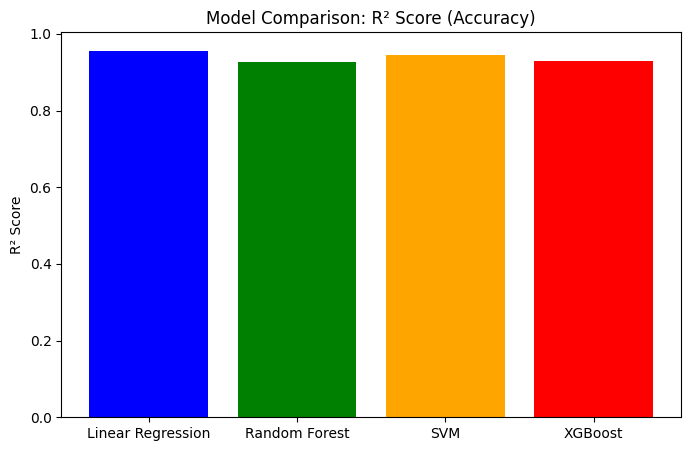

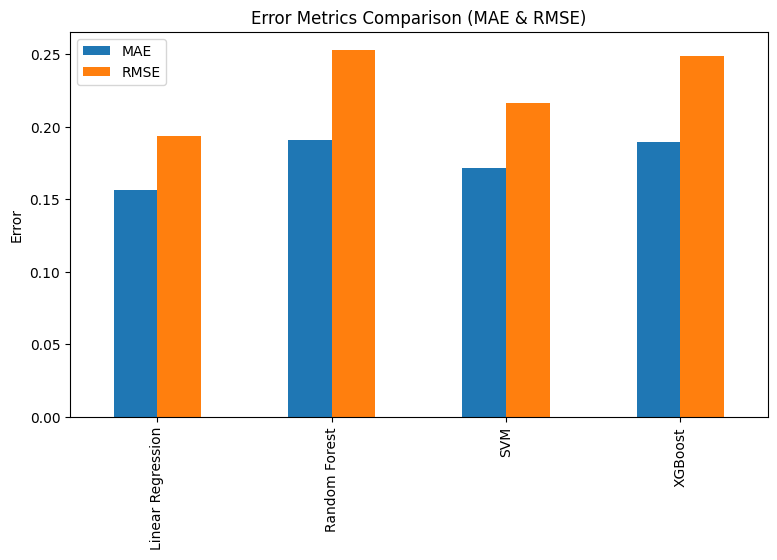

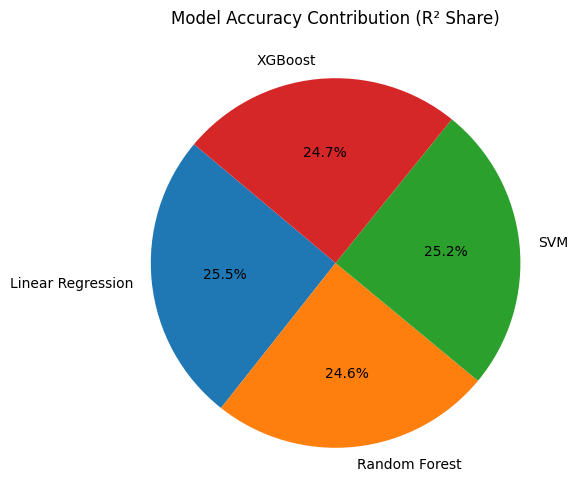

In [63]:
#ploting the graphs
plt.figure(figsize=(8,5))
plt.bar(results_df.index, results_df['R2'], color=['blue','green','orange','red'])
plt.title("Model Comparison: R² Score (Accuracy)")
plt.ylabel("R² Score")
plt.show()

results_df[['MAE','RMSE']].plot(kind='bar', figsize=(9,5))
plt.title("Error Metrics Comparison (MAE & RMSE)")
plt.ylabel("Error")
plt.show()

plt.figure(figsize=(6,6))
plt.pie(results_df['R2'], labels=results_df.index, autopct='%1.1f%%', startangle=140)
plt.title("Model Accuracy Contribution (R² Share)")
plt.show()

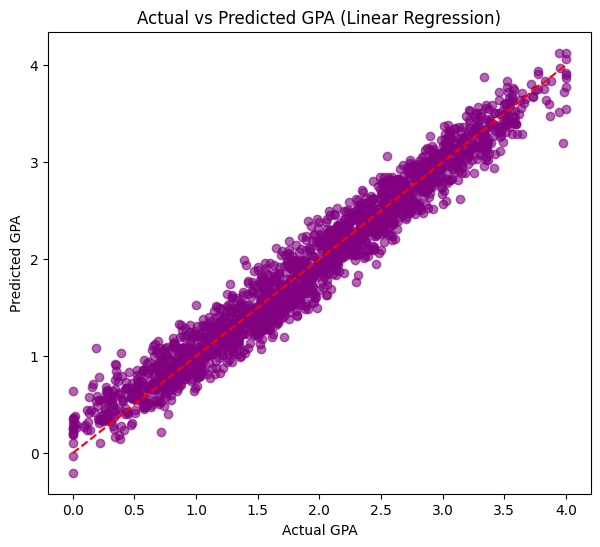


Best Model: Linear Regression with R² = 0.956


In [64]:
#plotting the best model graph
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
Y_best_pred = best_model.predict(X_test)

plt.figure(figsize=(7,6))
plt.scatter(Y_test, Y_best_pred, alpha=0.6, color='purple')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title(f'Actual vs Predicted GPA ({best_model_name})')
plt.show()

print(f"\nBest Model: {best_model_name} with R² = {results_df['R2'].max():.3f}")


===== Logistic Regression (Classification Results) =====
Accuracy: 0.9478
Precision: 0.9517
Recall: 0.9438
F1 Score: 0.9478

===== Regression Model Comparison =====
               Model        R2       MAE      RMSE
0  Linear Regression  0.956296  0.156335  0.193535
1      Random Forest  0.925518  0.191119  0.252653
2                SVM  0.945395  0.171385  0.216330
3            XGBoost  0.928007  0.189234  0.248396

===== Regression Model Comparison =====
{'Linear Regression': {'R2': 0.9562960809333036, 'MAE': 0.1563347968196491, 'RMSE': np.float64(0.19353498270008895), 'MAPE': np.float64(17441649.71357514)}, 'Random Forest': {'R2': 0.9255179380933818, 'MAE': 0.19111910324231549, 'RMSE': np.float64(0.25265339114847263), 'MAPE': np.float64(21524115.853441246)}, 'SVM': {'R2': 0.9453947143442187, 'MAE': 0.1713850199807539, 'RMSE': np.float64(0.21632993911048187), 'MAPE': np.float64(22563490.583591796)}, 'XGBoost': {'R2': 0.9280069674341476, 'MAE': 0.1892344217516036, 'RMSE': np.float64(

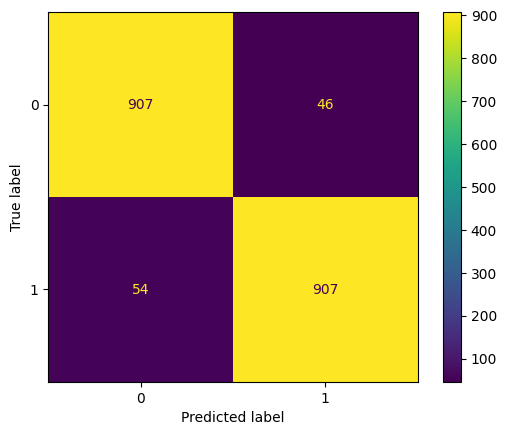

Model Accuracy: 0.9477533960292581


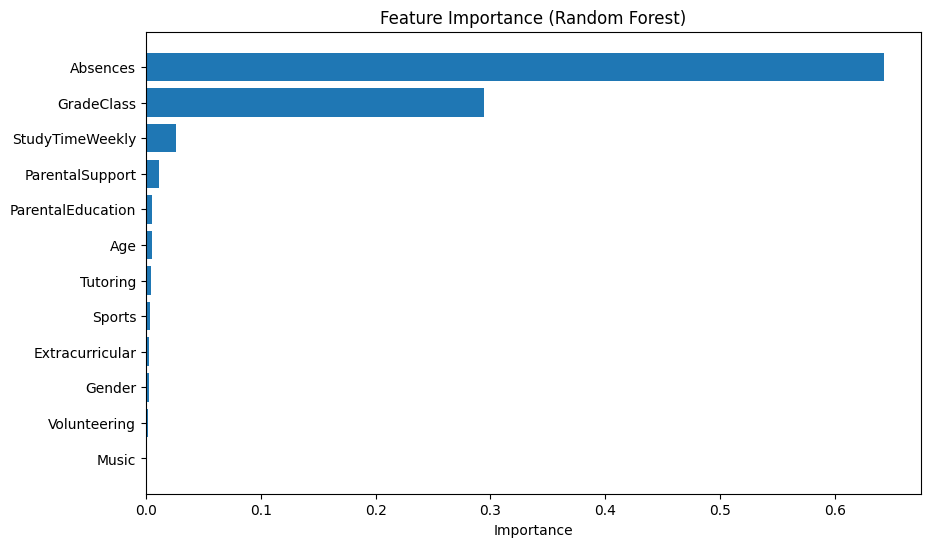


Top 5 Factors Influencing Final Grades:
              Feature  RandomForest Importance  XGBoost Importance
4            Absences                 0.643119            0.511371
11         GradeClass                 0.294698            0.412551
3     StudyTimeWeekly                 0.025704            0.005746
6     ParentalSupport                 0.011371            0.014522
2   ParentalEducation                 0.005482            0.003633


In [65]:
#calculating the logistic regression for future predictions
threshold = Y.mean()
y_class = (Y> threshold).astype(int)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.8, random_state=1000)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_c, y_train_c)
y_pred_class = log_reg.predict(X_test_c)

# Classification Metrics
acc = accuracy_score(y_test_c, y_pred_class)
prec = precision_score(y_test_c, y_pred_class)
rec = recall_score(y_test_c, y_pred_class)
f1 = f1_score(y_test_c, y_pred_class)

print("\n===== Logistic Regression (Classification Results) =====")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

print("\n===== Regression Model Comparison =====")
# Display the R2 Score, MAE, and RMSE columns from the results_df
print(results_df[['Model', 'R2', 'MAE', 'RMSE']])
print("\n===== Regression Model Comparison =====")
print(results)
print("\n===== Confusion Matrix =====")
cm = confusion_matrix(y_test_c, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print("Model Accuracy:", accuracy_score(y_test_c, y_pred_class))
rf = trained_models['Random Forest']
xgb = trained_models['XGBoost']

# Now the feature importance code will work:
rf_importance = rf.feature_importances_
xgb_importance = xgb.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest Importance': rf_importance,
    'XGBoost Importance': xgb_importance
}).sort_values(by='RandomForest Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['RandomForest Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.show()

print("\nTop 5 Factors Influencing Final Grades:")
print(importance_df.head(5))